<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/Graph_Convolution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
replace DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
!pip install visualkeras

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_health
/content/DATA_PICTURE_3D_Change/picture_health/h_0.049_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.028_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.009_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.09_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.009_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.075_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.048_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.045_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.069_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.041_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.038_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.084_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.078_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.058_void_0.3.csv
/content/DATA_PICTURE_3D_Change/pi

In [7]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)


In [8]:
x_health , y_health , z_health = [] , [] , []

# fig = plt.figure(figsize=(10 , 5 ))
# ax0 = fig.add_subplot(1 , 3 , 1 , projection='3d' )
# ax1 = fig.add_subplot(1 , 3 , 2 )
# ax2 = fig.add_subplot(1 , 3 , 3  )

for i in total_health_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax1.scatter3D(i['x'] , i['y'] , [ [0,0,0] for i in i['z']]   , label='Health Point' , c = 'red'   )
  # ax1.scatter(i['x'] , i['z']  , c = 'r' , label = 'HP-2D, (x,y)'   )
  # ax2.scatter(i['y'] , i['z']  , c = 'g' , label = 'HP-2D, (y,z)'   )
  # ax0.legend()
  # ax0.grid()
  # ax1.legend()
  # ax1.grid()
  # ax2.legend()
  # ax2.grid()

  # plt.show()


  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])
  # break

In [9]:
z_health.shape

AttributeError: 'list' object has no attribute 'shape'

In [8]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-$(python -c "import torch; print(torch.__version__)").html

Looking in links: https://data.pyg.org/whl/torch-2.8.0+cu126.html


In [11]:
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import knn_graph
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.12/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.12/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c106detail14torchCheckFailEPKcS2_jRKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.12/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.12/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c106detail14torchCheckFailEPKcS2_jRKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.12/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage

ImportError: cannot import name 'knn_graph' from 'torch_geometric.utils' (/usr/local/lib/python3.12/dist-packages/torch_geometric/utils/__init__.py)

In [12]:
def draw_Graph(d_x , d_y , d_z , class_label = 'Not Set Class') :
  import matplotlib.pyplot as plt
  import networkx as nx
  import numpy as np

  # داده‌های خودت
  X = d_x   # ابعاد: 16x3
  Y = d_y
  Z = d_z

  # ساخت گراف
  G = nx.Graph()

  # افزودن نودها
  for r in range(X.shape[0]):      # 16
      for c in range(X.shape[1]):  # 3
          node_id = (r, c)
          G.add_node(node_id, pos=(X[r, c], Y[r, c], Z[r, c]))

  # افزودن یال‌ها
  for r in range(X.shape[0]):
      for c in range(X.shape[1]):
          if r < X.shape[0] - 1:   # اتصال به ردیف بعدی
              G.add_edge((r, c), (r+1, c))
          if c < X.shape[1] - 1:   # اتصال به ستون بعدی
              G.add_edge((r, c), (r, c+1))

  # رسم
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  pos = nx.get_node_attributes(G, 'pos')

  # رسم نودها
  for node, (x, y, z) in pos.items():
      ax.scatter(x, y, z, c='b', s=30)

  # رسم یال‌ها
  for (n1, n2) in G.edges:
      xline = [pos[n1][0], pos[n2][0]]
      yline = [pos[n1][1], pos[n2][1]]
      zline = [pos[n1][2], pos[n2][2]]
      ax.plot(xline, yline, zline, c='red')

  ax.view_init(elev=25, azim=-110)
  ax.set_xlabel('X - axis' , labelpad=15 )
  ax.set_ylabel('Y - axis' , labelpad=15 )
  ax.set_zlabel('Z - axis' , labelpad=2 )
  ax.set_title(f'Node and Edge For Markers On Balde {class_label}' )
  ax.tick_params(axis='x', pad=10)  # فاصله 8 واحد
  ax.tick_params(axis='y', pad=10)
  ax.tick_params(axis='z', pad=1)

  plt.show()



In [11]:
i['x']

array([[ 64.95914395,  64.95847008,  64.95606331],
       [ 80.02001877,  80.01204988,  80.01506589],
       [ 95.0432345 ,  95.03929958,  95.04397971],
       [110.05335344, 110.05455218, 110.05325959],
       [125.06319216, 125.06424113, 125.06320725],
       [140.0990689 , 140.09959047, 140.10328959],
       [155.12404298, 155.12743997, 155.12777039],
       [170.15827886, 170.15606   , 170.15333221],
       [185.2018391 , 185.1928838 , 185.19393055],
       [200.2220799 , 200.22254716, 200.22559049],
       [215.27590803, 215.27508565, 215.27252698],
       [230.3048614 , 230.2971538 , 230.2976099 ],
       [245.33744652, 245.3387701 , 245.33451859],
       [260.37769796, 260.38513275, 260.38070745],
       [275.42586532, 275.42736964, 275.42366692],
       [330.39205962, 330.38862234, 330.39646751]])

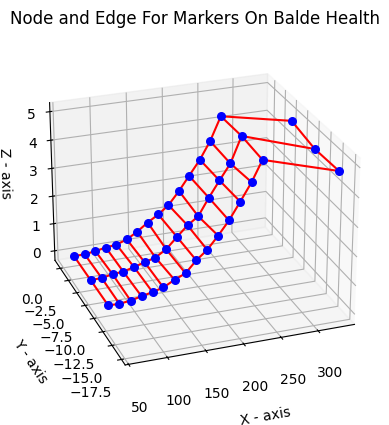

In [13]:
draw_Graph(i['x'] , i['y'] , i['z'] , 'Health')

In [23]:
x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )

In [24]:
print("z_health.shape :" , x_health.shape  )
print("y_health.shape :" , y_health.shape  )
print("z_health.shape :" , z_health.shape  )



z_health.shape : (396, 16, 3, 1)
y_health.shape : (396, 16, 3, 1)
z_health.shape : (396, 16, 3, 1)


In [33]:
total_fault_alpha_x_y_z , label_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_alpha' :
      total_fault_alpha_x_y_z.append(img)
      label_alpha.append(i)


In [34]:
x_alpha , y_alpha , z_alpha = [] , [] , []

for i in total_fault_alpha_x_y_z:
  x_alpha.append(i['x'])
  y_alpha.append(i['y'])
  z_alpha.append(i['z'])
  break


In [17]:
x_alpha = np.array(x_alpha).reshape(-1 , 16 , 3 , 1 )
y_alpha = np.array(y_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.array(z_alpha).reshape(-1 , 16 , 3 , 1 )

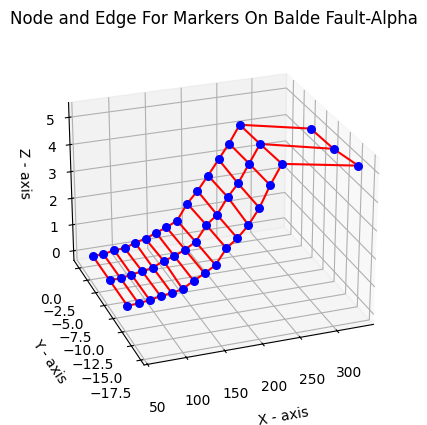

In [36]:
draw_Graph(i['x'] , i['y'] , i['z'] , 'Fault-Alpha')

In [3]:
import numpy as np
import torch
from torch_geometric.data import Data
import networkx as nx
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn as nn

# --- 1. داده‌های نمونه 48 نقطه ---
N, M = 16, 3
d_x = np.random.rand(N, M)
d_y = np.random.rand(N, M)
d_z = np.random.rand(N, M)

# --- 2. defect mask تصادفی ---
defect_mask = np.random.rand(N, M) < 0.3  # حدود 30٪ نقاط معیوب

# --- 3. تابع ری‌اندکس edge_index ---
def reindex_edge_index(edge_index, nodes):
    node_id_map = {old_id: new_id for new_id, old_id in enumerate(nodes)}
    mask = [(i.item() in node_id_map) and (j.item() in node_id_map) for i,j in edge_index.t()]
    edge = edge_index[:, mask]
    if edge.size(1) == 0:
        # حداقل یک یال self-loop اگر هیچ یال باقی نماند
        n = len(nodes)
        edge = torch.tensor([[0],[0]], dtype=torch.long)
    edge_reindexed = torch.tensor([[node_id_map[i.item()] for i in edge[0]],
                                   [node_id_map[j.item()] for j in edge[1]]], dtype=torch.long)
    return edge_reindexed

# --- 4. ساخت گراف Local و Global ---
def build_local_global_graph(d_x, d_y, d_z, defect_mask):
    N, M = d_x.shape
    G = nx.Graph()

    # add nodes
    for r in range(N):
        for c in range(M):
            node_id = r*M + c
            G.add_node(node_id, pos=np.array([d_x[r,c], d_y[r,c], d_z[r,c]]),
                       defect=defect_mask[r,c])

    # add edges (grid)
    for r in range(N):
        for c in range(M):
            node_id = r*M + c
            if r < N-1:
                G.add_edge(node_id, (r+1)*M + c)
            if c < M-1:
                G.add_edge(node_id, r*M + (c+1))

    # prepare node features
    pos = np.stack([G.nodes[n]['pos'] for n in G.nodes])
    edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
    x = torch.tensor(pos, dtype=torch.float)

    # Local
    defect_nodes = [n for n in G.nodes if G.nodes[n]['defect']]
    if len(defect_nodes) == 0:
        defect_nodes = [0]  # حداقل یک نود
    edge_local = reindex_edge_index(edge_index, defect_nodes)
    x_local = x[defect_nodes]
    data_local = Data(x=x_local, edge_index=edge_local)

    # Global
    healthy_nodes = [n for n in G.nodes if not G.nodes[n]['defect']]
    if len(healthy_nodes) == 0:
        healthy_nodes = [0]  # حداقل یک نود
    edge_global = reindex_edge_index(edge_index, healthy_nodes)
    x_global = x[healthy_nodes]
    data_global = Data(x=x_global, edge_index=edge_global)

    return data_local, data_global

data_local, data_global = build_local_global_graph(d_x, d_y, d_z, defect_mask)

# --- 5. مدل MVGCN ---
class MVGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(MVGCN, self).__init__()
        self.local_conv1 = GCNConv(in_channels, hidden_channels)
        self.local_conv2 = GCNConv(hidden_channels, hidden_channels)

        self.global_conv1 = GCNConv(in_channels, hidden_channels)
        self.global_conv2 = GCNConv(hidden_channels, hidden_channels)

        self.fc1 = nn.Linear(2*hidden_channels, hidden_channels)
        self.fc2 = nn.Linear(hidden_channels, out_channels)

    def forward(self, x_local, edge_index_local, x_global, edge_index_global):
        # Local view
        h_local = F.relu(self.local_conv1(x_local, edge_index_local))
        h_local = F.relu(self.local_conv2(h_local, edge_index_local))
        h_local = global_mean_pool(h_local, torch.zeros(h_local.size(0), dtype=torch.long))

        # Global view
        h_global = F.relu(self.global_conv1(x_global, edge_index_global))
        h_global = F.relu(self.global_conv2(h_global, edge_index_global))
        h_global = global_mean_pool(h_global, torch.zeros(h_global.size(0), dtype=torch.long))

        # Fusion
        h = torch.cat([h_local, h_global], dim=-1)
        h = F.relu(self.fc1(h))
        out = self.fc2(h)
        return out

# --- 6. اجرای مدل ---
model = MVGCN(in_channels=3, hidden_channels=16, out_channels=2)
output = model(data_local.x, data_local.edge_index, data_global.x, data_global.edge_index)
print("Output MVGCN:", output)


Output MVGCN: tensor([[-0.0204,  0.1692]], grad_fn=<AddmmBackward0>)


In [25]:
import numpy as np
import torch
from torch_geometric.data import Data, Batch
import networkx as nx
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

# --- 1. تبدیل داده‌ها به گراف ---
def reindex_edge_index(edge_index, nodes):
    node_id_map = {old_id: new_id for new_id, old_id in enumerate(nodes)}
    mask = [(i.item() in node_id_map) and (j.item() in node_id_map) for i,j in edge_index.t()]
    edge = edge_index[:, mask]
    if edge.size(1) == 0:
        edge = torch.tensor([[0],[0]], dtype=torch.long)
    edge_reindexed = torch.tensor([[node_id_map[i.item()] for i in edge[0]],
                                   [node_id_map[j.item()] for j in edge[1]]], dtype=torch.long)
    return edge_reindexed

def build_local_global_graph(d_x, d_y, d_z, defect_mask):
    N, M = d_x.shape
    G = nx.Graph()
    for r in range(N):
        for c in range(M):
            node_id = r*M + c
            G.add_node(node_id, pos=np.array([d_x[r,c], d_y[r,c], d_z[r,c]]),
                       defect=defect_mask[r,c])
    # edges
    for r in range(N):
        for c in range(M):
            node_id = r*M + c
            if r < N-1:
                G.add_edge(node_id, (r+1)*M + c)
            if c < M-1:
                G.add_edge(node_id, r*M + (c+1))
    pos = np.stack([G.nodes[n]['pos'] for n in G.nodes])
    edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
    x = torch.tensor(pos, dtype=torch.float)
    # Local
    defect_nodes = [n for n in G.nodes if G.nodes[n]['defect']]
    if len(defect_nodes) == 0:
        defect_nodes = [0]
    edge_local = reindex_edge_index(edge_index, defect_nodes)
    x_local = x[defect_nodes]
    data_local = Data(x=x_local, edge_index=edge_local)
    # Global
    healthy_nodes = [n for n in G.nodes if not G.nodes[n]['defect']]
    if len(healthy_nodes) == 0:
        healthy_nodes = [0]
    edge_global = reindex_edge_index(edge_index, healthy_nodes)
    x_global = x[healthy_nodes]
    data_global = Data(x=x_global, edge_index=edge_global)
    return data_local, data_global

# --- 2. آماده‌سازی تمام گراف‌ها ---
def prepare_dataset(x_list, y_list, z_list, label):
    data_list = []
    for dx, dy, dz in zip(x_list, y_list, z_list):
        defect_mask = np.zeros((16,3), dtype=bool)
        data_local, data_global = build_local_global_graph(dx, dy, dz, defect_mask)
        data_local.y = torch.tensor([label], dtype=torch.long)
        data_global.y = torch.tensor([label], dtype=torch.long)
        data_list.append( (data_local, data_global) )
    return data_list

# --- 3. مدل MVGCN ---
class MVGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(MVGCN, self).__init__()
        self.local_conv1 = GCNConv(in_channels, hidden_channels)
        self.local_conv2 = GCNConv(hidden_channels, hidden_channels)
        self.global_conv1 = GCNConv(in_channels, hidden_channels)
        self.global_conv2 = GCNConv(hidden_channels, hidden_channels)
        self.fc1 = nn.Linear(2*hidden_channels, hidden_channels)
        self.fc2 = nn.Linear(hidden_channels, out_channels)
    def forward(self, x_local, edge_index_local, x_global, edge_index_global):
        h_local = F.relu(self.local_conv1(x_local, edge_index_local))
        h_local = F.relu(self.local_conv2(h_local, edge_index_local))
        h_local = global_mean_pool(h_local, torch.zeros(h_local.size(0), dtype=torch.long))
        h_global = F.relu(self.global_conv1(x_global, edge_index_global))
        h_global = F.relu(self.global_conv2(h_global, edge_index_global))
        h_global = global_mean_pool(h_global, torch.zeros(h_global.size(0), dtype=torch.long))
        h = torch.cat([h_local, h_global], dim=-1)
        h = F.relu(self.fc1(h))
        out = self.fc2(h)
        return out

# --- 4. مثال استفاده ---
# x_health, y_health, z_health : numpy arrays shape (-1,16,3,1)
x_health = x_health.squeeze(-1)
y_health = y_health.squeeze(-1)
z_health = z_health.squeeze(-1)
dataset_health = prepare_dataset(x_health, y_health, z_health, label=0)  # label=0 سالم

# اگر داده‌های معیوب هم داری:
# x_def, y_def, z_def = ...
# dataset_defect = prepare_dataset(x_def, y_def, z_def, label=1)

# ترکیب همه نمونه‌ها
dataset_all = dataset_health  # + dataset_defect

# --- 5. Training loop ساده ---
model = MVGCN(in_channels=3, hidden_channels=16, out_channels=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):  # تعداد epoch کوتاه برای تست
    total_loss = 0
    for data_local, data_global in dataset_all:
        optimizer.zero_grad()
        out = model(data_local.x, data_local.edge_index,
                    data_global.x, data_global.edge_index)
        loss = criterion(out, data_global.y)  # برچسب graph-level
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 5.8328
Epoch 2, Loss: 0.0000
Epoch 3, Loss: 0.0000
Epoch 4, Loss: 0.0000
Epoch 5, Loss: 0.0000


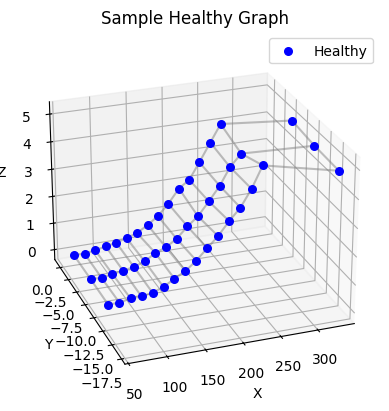

In [26]:
import matplotlib.pyplot as plt

def visualize_local_global(d_x, d_y, d_z, defect_mask, title='Graph View'):
    """
    d_x, d_y, d_z: numpy arrays shape (16,3)
    defect_mask: boolean mask shape (16,3), True = defect
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    N, M = d_x.shape

    # رسم نقاط سالم و معیوب
    for r in range(N):
        for c in range(M):
            x, y, z = d_x[r,c], d_y[r,c], d_z[r,c]
            if defect_mask[r,c]:
                ax.scatter(x, y, z, c='r', s=50, label='Defect' if r==0 and c==0 else "")
            else:
                ax.scatter(x, y, z, c='b', s=30, label='Healthy' if r==0 and c==0 else "")

    # رسم یال‌ها (grid)
    for r in range(N):
        for c in range(M):
            if r < N-1:
                ax.plot([d_x[r,c], d_x[r+1,c]], [d_y[r,c], d_y[r+1,c]], [d_z[r,c], d_z[r+1,c]], c='gray', alpha=0.5)
            if c < M-1:
                ax.plot([d_x[r,c], d_x[r,c+1]], [d_y[r,c], d_y[r,c+1]], [d_z[r,c], d_z[r,c+1]], c='gray', alpha=0.5)

    ax.view_init(elev=25, azim=-110)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

# --- تست روی یک نمونه ---
sample_idx = 0
dx = np.squeeze(x_health[sample_idx])
dy = np.squeeze(y_health[sample_idx])
dz = np.squeeze(z_health[sample_idx])

defect_mask_sample = np.zeros((16,3), dtype=bool)  # تمام سالم
visualize_local_global(dx, dy, dz, defect_mask_sample, title='Sample Healthy Graph')
# اگر نمونه معیوب داری:
# dx_def, dy_def, dz_def = ...
# defect_mask_def = ... (True در نقاط معیوب)
# visualize_local_global(dx_def, dy_def, dz_def, defect_mask_def, title='Sample Defect Graph')


In [38]:
dx_new = i['x']  # shape (16,3)
dy_new = i['y']
dz_new = i['z']

dx_new = np.squeeze(dx_new)
dy_new = np.squeeze(dy_new)
dz_new = np.squeeze(dz_new)

defect_mask_new = np.zeros((16,3), dtype=bool)

from torch_geometric.data import Data

data_local_new, data_global_new = build_local_global_graph(dx_new, dy_new, dz_new, defect_mask_new)

model.eval()  # مدل را در حالت evaluation قرار بده

with torch.no_grad():
    output_new = model(data_local_new.x, data_local_new.edge_index,
                       data_global_new.x, data_global_new.edge_index)

    probs_new = torch.softmax(output_new, dim=-1)
    pred_class_new = torch.argmax(probs_new, dim=-1)

print("Logits:", output_new)
print("Probabilities:", probs_new)
print("Predicted class:", pred_class_new)

Logits: tensor([[ 41.5916, -10.1323]])
Probabilities: tensor([[1.0000e+00, 3.4401e-23]])
Predicted class: tensor([0])


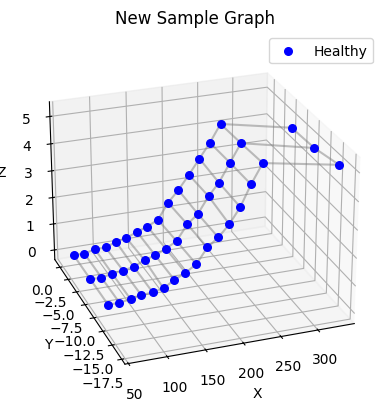

In [35]:
visualize_local_global(dx_new, dy_new, dz_new, defect_mask_new, title='New Sample Graph')
